### Student Performance in Exams Analysis

In [1]:
import os
import sys
import pprint
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

# Define project root dynamically, gets the current directory from whick the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *

# Build route to CSV and upload
csv_path = project_root / "Data" / "Raw" / "StudentsPerformance.csv"
df_students = load_csv(str(csv_path))


In [3]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df_students.sample(25)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
141,female,group C,some college,free/reduced,none,59,62,64
821,female,group D,bachelor's ...,free/reduced,none,78,90,93
56,female,group E,associate's...,standard,completed,82,85,86
564,male,group B,bachelor's ...,free/reduced,none,48,51,46
974,female,group A,some college,standard,none,54,63,67
59,female,group C,some high s...,free/reduced,none,0,17,10
364,male,group C,some college,standard,none,59,60,58
708,male,group D,high school,standard,none,89,87,79
238,male,group B,some college,standard,none,54,52,51
4,male,group C,some college,standard,none,76,78,75


In [5]:
df_students = normalize_columns_header(df_students)
print(df_students.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [6]:
df_students = normalize_string(df_students)
df_students.sample(25)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
3,male,group_a,associate's...,free_reduced,none,47,57,44
388,female,group_d,high_school,standard,none,62,64,64
225,female,group_e,master's_de...,free_reduced,none,45,56,54
129,female,group_a,bachelor's_...,standard,none,51,49,51
509,female,group_c,bachelor's_...,standard,none,86,92,87
746,male,group_d,high_school,standard,none,69,75,71
505,female,group_b,some_high_s...,standard,none,82,82,80
682,male,group_b,high_school,standard,none,62,55,54
47,female,group_c,high_school,standard,none,66,71,76
547,male,group_c,high_school,standard,completed,72,67,64


In [7]:
print(f"Number of explicit duplicates: ",df_students.duplicated().sum())


Number of explicit duplicates:  0


In [8]:
print(detect_implicit_duplicates(df_students, include=None, exclude=['math score', 'reading score', 'writing score']))


Column: 'gender'


Searching implicit values for: 'gender': 100%|██████████| 2/2 [00:00<00:00, 2347.12it/s]


  'male' → ['female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female'

Searching implicit values for: 'lunch': 100%|██████████| 1/1 [00:00<00:00, 2605.16it/s]



Column: 'test_preparation_course'


Searching implicit values for: 'test_preparation_course': 100%|██████████| 2/2 [00:00<00:00, 1441.59it/s]

None


In [9]:
print("Number of missing values: \n", df_students.isna().sum())

Number of missing values: 
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


#### Exploratory Data Analysis

In [10]:
print(df_students.describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


What does the standard deviation (std) measure?

The std measures how much the data vary from the mean.

- If the std is small, the data are highly concentrated near the mean.
- If the std is large, the data are highly dispersed and more disordered.

### Scores

##### _*** Overall Mean Scores ***_

In [11]:
def score_classification(score):
    if score <= 10:
        return '0-9'
    elif 9 < score <= 19:
        return '10-19'
    elif 19 < score <= 29:
        return '20-29'
    elif 29 < score <= 39:
        return '30-39'
    elif 39 < score <= 49:
        return '40-49'
    elif 49 < score <= 59:
        return '50-59'
    elif 59 < score <= 69:
        return '60-69'
    elif 69 < score <= 79:
        return '70-79'
    elif 79 < score <= 89:
        return '80-89'
    elif 89 < score <= 99:
        return '90-99'
    else:
        return '100'

print("*** Overall scores ***")
print()
df_students['overall_scores'] = (df_students['math_score'] + df_students['reading_score'] + df_students['writing_score'])/3
print(df_students['overall_scores'].describe())
print()
print("Overall students with zero score: ", df_students.loc[df_students['overall_scores'] == 0].shape[0])
print()
print("Overall students with 100 score: ", df_students.loc[df_students['overall_scores'] == 100].shape[0])
print()
print(df_students.loc[df_students['overall_scores'] == 100])
print()
df_students['score_classification'] = df_students['overall_scores'].apply(score_classification)
print("Overall score classification: \n", df_students.groupby(['score_classification'])['overall_scores'].count())
print()
print("Overall lunch: \n", df_students.groupby(['lunch'])['overall_scores'].count())
print()
print("Overall prep: \n", df_students.groupby(['test_preparation_course'])['overall_scores'].count())
print()
print(df_students.groupby(['race_ethnicity', 'parental_level_of_education'])['overall_scores'].count())
print()
print("Gender Students by ethnicity ", df_students.groupby('race_ethnicity')['gender'].value_counts())
print()
print("Overall students with 60-69 score and standard lunch: ", df_students.loc[(df_students['score_classification'] == '60-69') & (df_students['lunch'] == 'standard')].shape[0])
print("Overall students with 60-69 score and free/reduced lunch: ", df_students.loc[(df_students['score_classification'] == '60-69') & (df_students['lunch'] == 'free/reduced')].shape[0])
print()
print("Overall students with 70-79 score and standard lunch: ", df_students.loc[(df_students['score_classification'] == '70-79') & (df_students['lunch'] == 'standard')].shape[0])
print("Overall students with 70-79 score and free/reduced lunch: ", df_students.loc[(df_students['score_classification'] == '70-79') & (df_students['lunch'] == 'free/reduced')].shape[0])
print()
print("Overall students with 80-89 score and standard lunch: ", df_students.loc[(df_students['score_classification'] == '80-89') & (df_students['lunch'] == 'standard')].shape[0])
print("Overall students with 80-89 score and free/reduced lunch: ", df_students.loc[(df_students['score_classification'] == '80-89') & (df_students['lunch'] == 'free/reduced')].shape[0])
print()
print("Overall students with 90-99 score and standard lunch: ", df_students.loc[(df_students['score_classification'] == '90-99') & (df_students['lunch'] == 'standard')].shape[0])
print("Overall students with 90-99 score and free/reduced lunch: ", df_students.loc[(df_students['score_classification'] == '90-99') & (df_students['lunch'] == 'free/reduced')].shape[0])
print()
print("Overall students with 60-69 score and none prep: ", df_students.loc[(df_students['score_classification'] == '60-69') & (df_students['test_preparation_course'] == 'none')].shape[0])
print("Overall students with 60-69 score and completed prep: ", df_students.loc[(df_students['score_classification'] == '60-69') & (df_students['test_preparation_course'] == 'completed')].shape[0])
print()
print("Overall students with 70-79 score and none prep: ", df_students.loc[(df_students['score_classification'] == '70-79') & (df_students['test_preparation_course'] == 'none')].shape[0])
print("Overall students with 70-79 score and completed prep: ", df_students.loc[(df_students['score_classification'] == '70-79') & (df_students['test_preparation_course'] == 'completed')].shape[0])
print()
print("Overall students with 80-89 score and none prep: ", df_students.loc[(df_students['score_classification'] == '80-89') & (df_students['test_preparation_course'] == 'none')].shape[0])
print("Overall students with 80-89 score and completed prep: ", df_students.loc[(df_students['score_classification'] == '80-89') & (df_students['test_preparation_course'] == 'completed')].shape[0])
print()
print("Overall students with 90-99 score and none prep: ", df_students.loc[(df_students['score_classification'] == '90-99') & (df_students['test_preparation_course'] == 'none')].shape[0])
print("Overall students with 90-99 score and completed prep: ", df_students.loc[(df_students['score_classification'] == '90-99') & (df_students['test_preparation_course'] == 'completed')].shape[0])
print()
print("Overall students with 100 score and none prep: ", df_students.loc[(df_students['score_classification'] == '100') & (df_students['test_preparation_course'] == 'none')].shape[0])
print("Overall students with 100 score and completed prep: ", df_students.loc[(df_students['score_classification'] == '100') & (df_students['test_preparation_course'] == 'completed')].shape[0])


*** Overall scores ***

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: overall_scores, dtype: float64

Overall students with zero score:  0

Overall students with 100 score:  3

     gender race_ethnicity parental_level_of_education     lunch test_preparation_course  math_score  reading_score  writing_score  overall_scores
458  female        group_e  bachelor's_...              standard            none                 100            100            100           100.0
916    male        group_e  bachelor's_...              standard       completed                 100            100            100           100.0
962  female        group_e  associate's...              standard            none                 100            100            100           100.0

Overall score classification: 
 score_classification
0-9        1
10-19      1
100        4
20-29      4
3

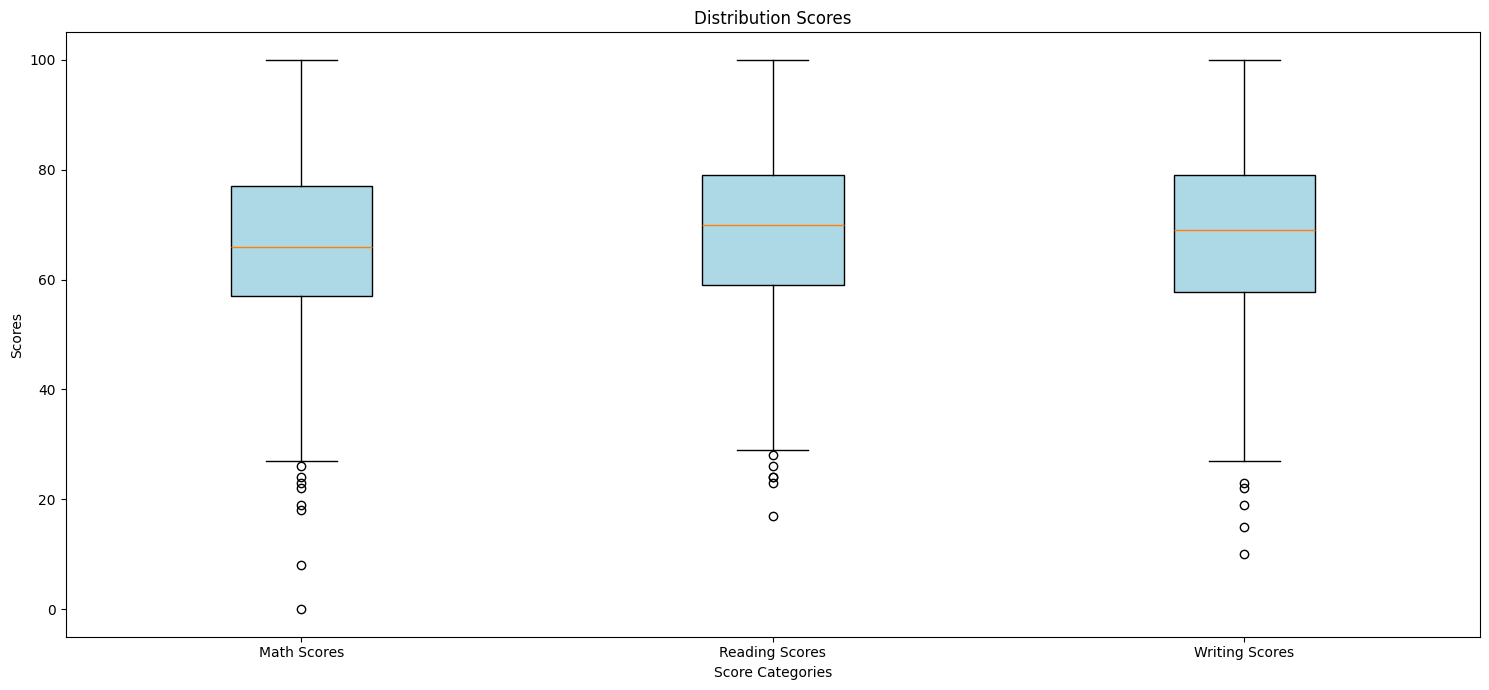

In [12]:
plt.figure(figsize=(15, 7))
plt.boxplot([df_students['math_score'], df_students['reading_score'], df_students['writing_score']], 
			vert=True, 
   			patch_artist=True, 
      		boxprops=dict(facecolor='lightblue'))
plt.title('Distribution Scores')
plt.xticks([1, 2, 3], ['Math Scores', 'Reading Scores', 'Writing Scores'])
plt.xlabel('Score Categories')
plt.ylabel('Scores')
plt.tight_layout()
plt.show()

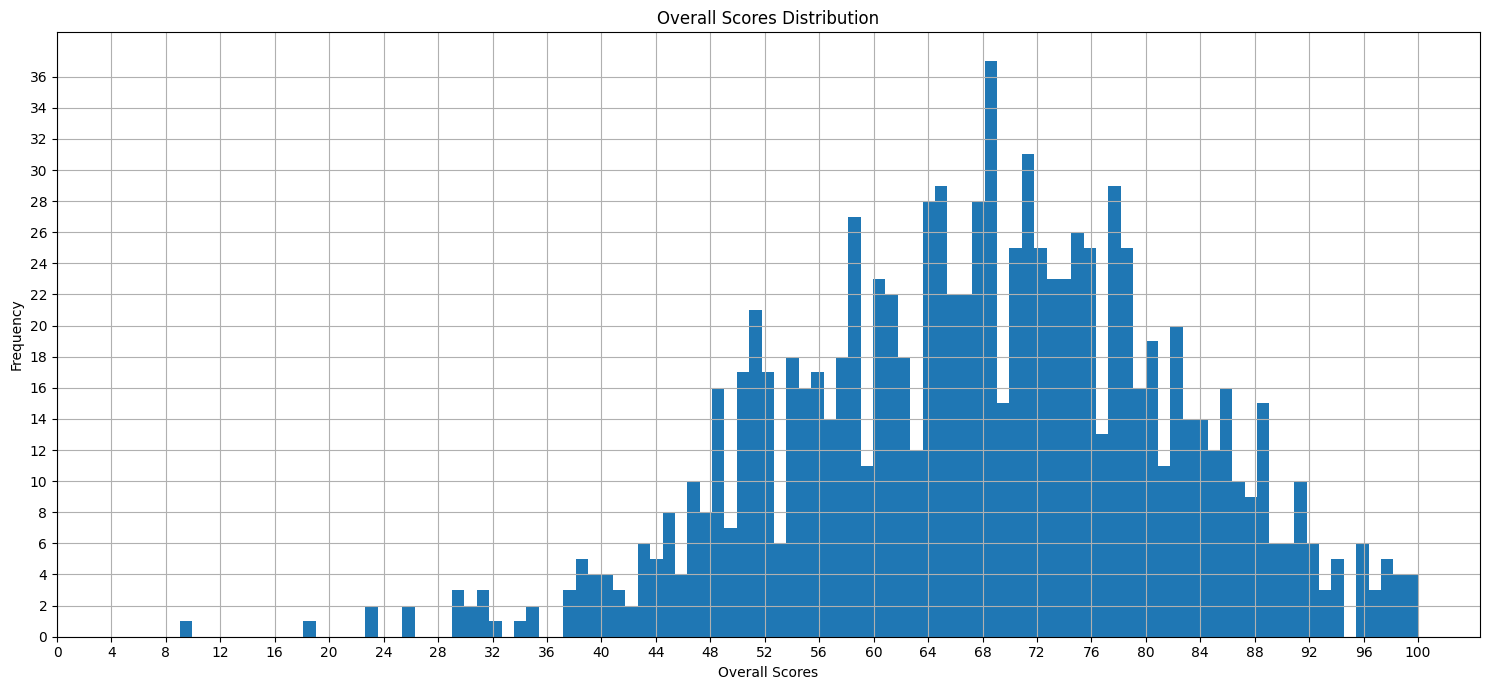

In [45]:
graph = df_students['overall_scores'].plot(kind='hist', 
                                   bins=100, 
                                   xlabel='Overall Scores', 
                                   ylabel='Frequency', 
                                   title='Overall Scores Distribution', 
                                   figsize=(15, 7),
                                   grid=True)
graph.set_xticks(range(0, 101, 4))
graph.set_yticks(range(0, 38, 2))

plt.tight_layout()
plt.show()

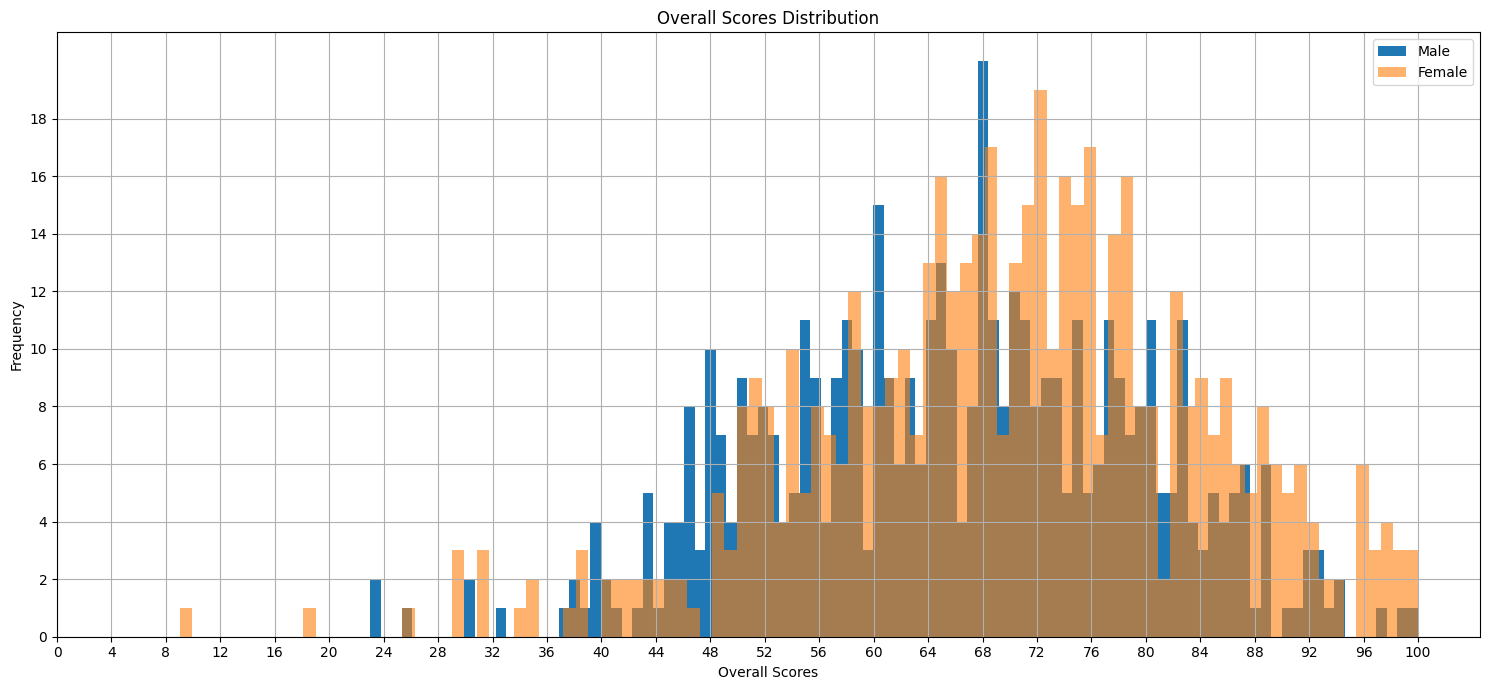

In [46]:
graph = df_students[df_students['gender'] == 'male']['overall_scores'].plot(kind='hist', 
                                                                    bins=100, 
                                                                    xlabel='Overall Scores', 
                                                                    ylabel='Frequency', 
                                                                    title='Overall Scores Distribution', 
                                                                    grid=True,
                                                                    figsize=(15, 7))
graph.set_xticks(range(0, 101, 4))
graph.set_yticks(range(0, 20, 2))

df_students[df_students['gender'] == 'female']['overall_scores'].plot(kind='hist', 
                                                                      bins=100, 
                                                                      xlabel='Overall Scores', 
                                                                      ylabel='Frequency', 
                                                                      title='Overall Scores Distribution', 
                                                                      figsize=(15, 7),
                                                                      grid=True,
                                                                      alpha=0.6)
graph.set_xticks(range(0, 101, 4))
graph.set_yticks(range(0, 20, 2))

plt.legend(['Male', 'Female'])
plt.tight_layout()
plt.show()

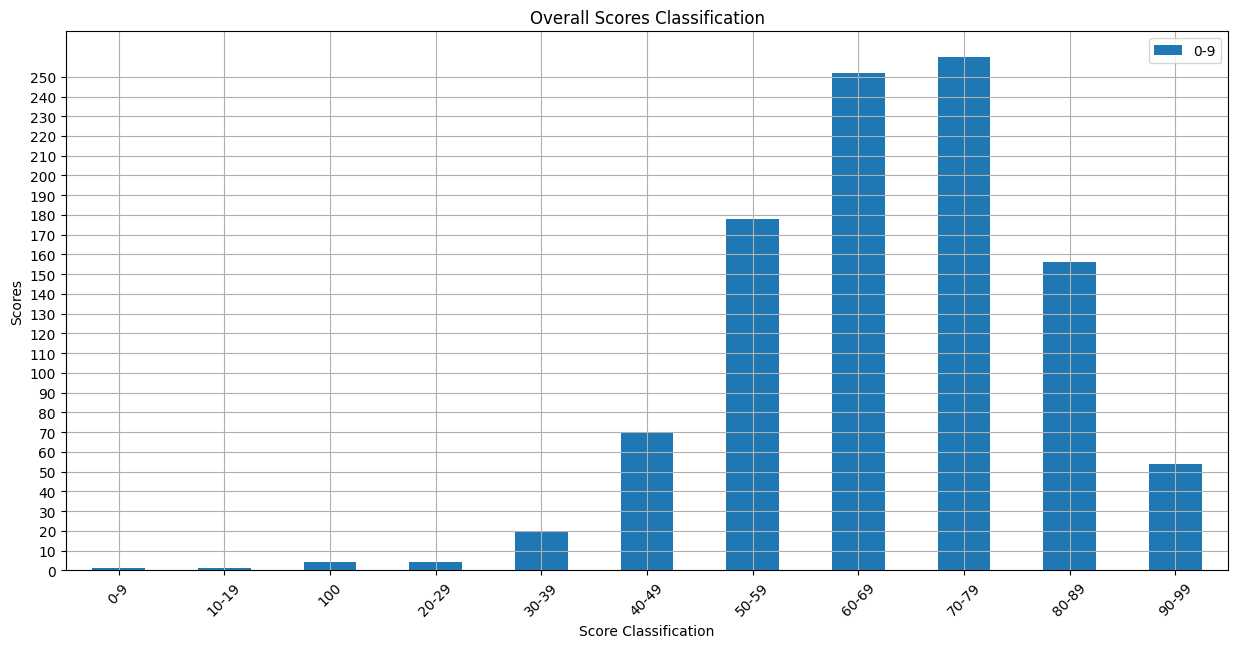

In [48]:
score_classification_counts = df_students.groupby('score_classification')['overall_scores'].count()

graph = score_classification_counts.plot(kind='bar',
                                 title='Overall Scores Classification',
                                 xlabel='Score Classification',
                                 ylabel='Scores',
                                 figsize=(15, 7),
                                 grid=True)

graph.set_yticks(range(0, 260, 10))

plt.legend(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100'])
plt.xticks(rotation=45)
plt.show()

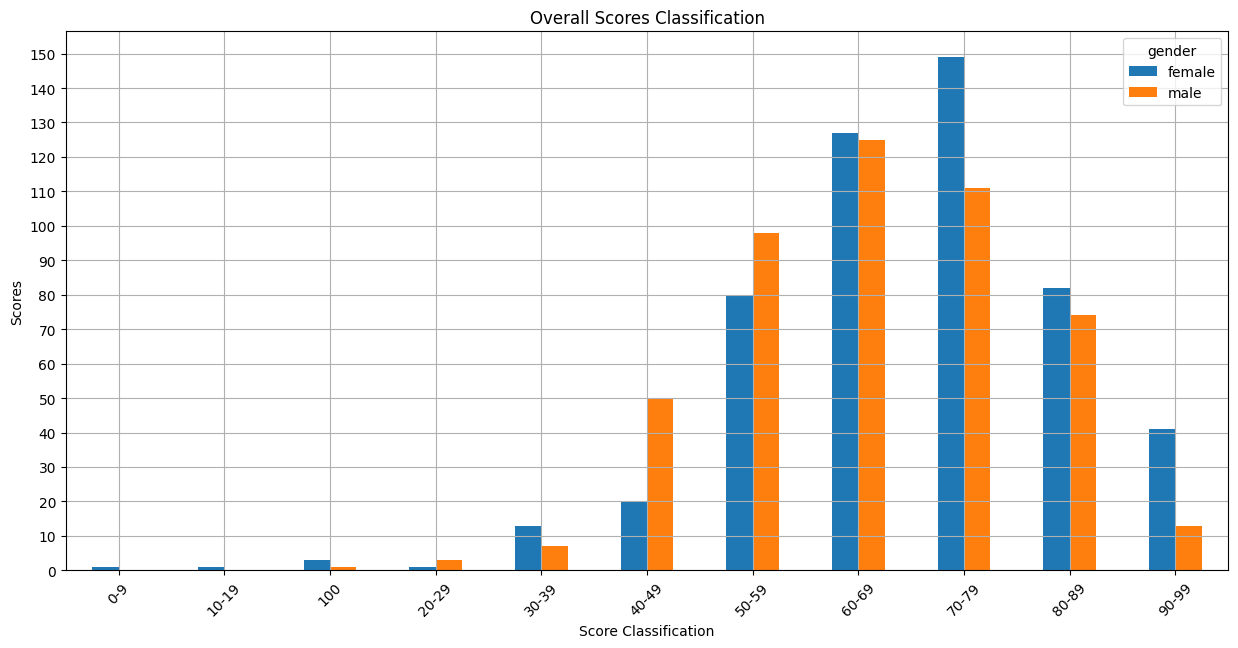

In [51]:
score_classification_counts = df_students.groupby(['score_classification', 'gender'])['overall_scores'].count().unstack()

graph = score_classification_counts.plot(kind='bar',
                                 title='Overall Scores Classification',
                                 xlabel='Score Classification',
                                 ylabel='Scores',
                                 figsize=(15, 7),
                                 grid=True,
                                 rot=45)
graph.set_yticks(range(0, 160, 10))
plt.tight_layout
plt.show()

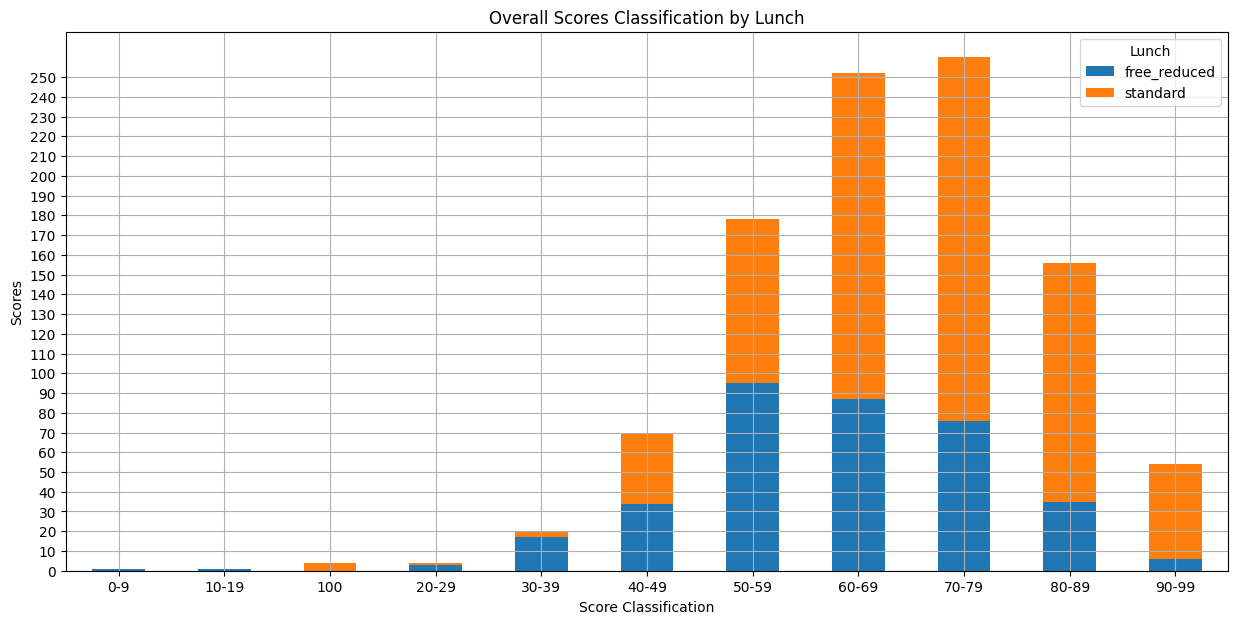

In [52]:
df_pvt_ovrl_scr_lnch = df_students.pivot_table(index='score_classification', 
                                               columns='lunch',
                                               values= 'overall_scores',
                                               aggfunc='count')

graph = df_pvt_ovrl_scr_lnch.plot(kind='bar', stacked=True, figsize=(15, 7), grid=True, rot=0)
graph.set_yticks(range(0, 260, 10))
plt.title('Overall Scores Classification by Lunch')
plt.xlabel('Score Classification')
plt.ylabel('Scores')
plt.legend(title='Lunch')
plt.show()

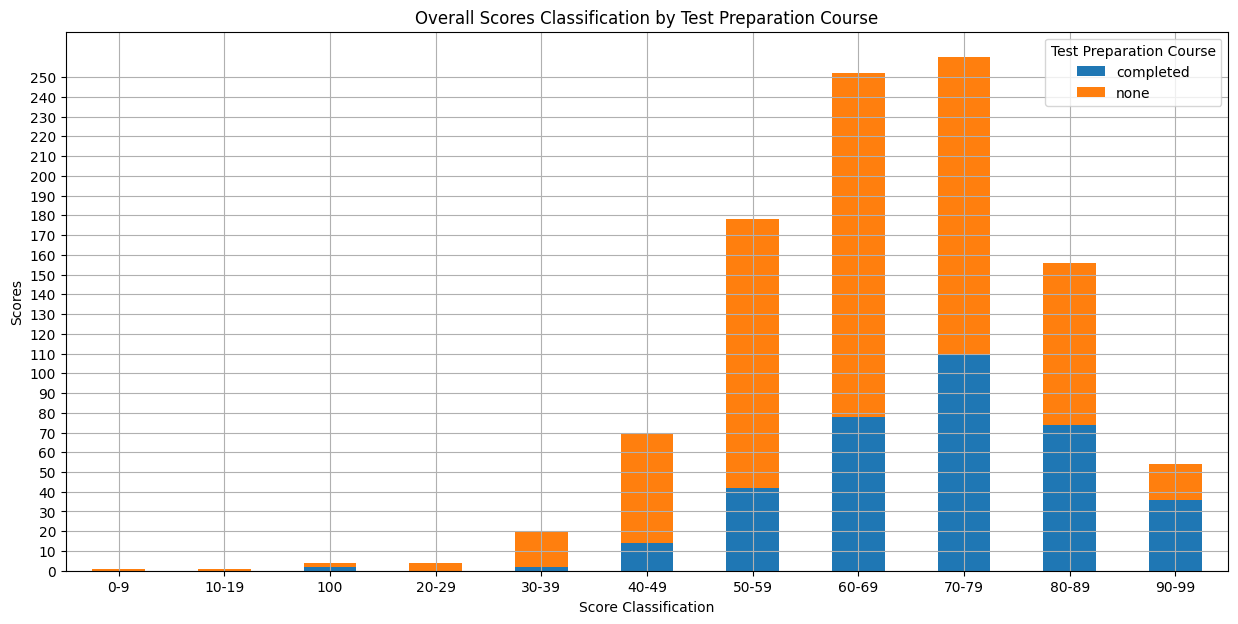

In [55]:
df_pvt_ovrl_scr_prep = df_students.pivot_table(index='score_classification', 
                                          columns='test_preparation_course',
                                          values= 'overall_scores',
                                          aggfunc='count').fillna(0)

graph = df_pvt_ovrl_scr_prep.plot(kind='bar', stacked=True, figsize=(15, 7), grid=True, rot=0)
graph.set_yticks(range(0, 260, 10))
plt.title('Overall Scores Classification by Test Preparation Course')
plt.xlabel('Score Classification')
plt.ylabel('Scores')
plt.legend(title='Test Preparation Course')
plt.show()

##### _*** MATH, WRITING, READING Distribution Scores ***

In [30]:
math_mean = df_students['math_score'].mean()
math_std = df_students['math_score'].std()

reading_mean = df_students['reading_score'].mean()
reading_std = df_students['reading_score'].std()

writing_mean = df_students['writing_score'].mean()
writing_std = df_students['writing_score'].std()


math_lower = math_mean - math_std # std lower than mean
math_upper = math_mean + math_std # std upper than mean

reading_lower = reading_mean - reading_std # std lower than mean
reading_upper = reading_mean + reading_std # std upper than mean

writing_lower = writing_mean - writing_std # std lower than mean
writing_upper = writing_mean + writing_std # std upper than mean


df_math_typical = df_students[(df_students['math_score'] >= math_lower) & (df_students['math_score'] <= math_upper)]
df_math_high = df_students[df_students['math_score'] > math_upper]
df_math_low = df_students[df_students['math_score'] < math_lower]

df_reading_typical = df_students[(df_students['reading_score'] >= reading_lower) & (df_students['reading_score'] <= reading_upper)]
df_reading_high = df_students[df_students['reading_score'] > reading_upper]
df_reading_low = df_students[df_students['reading_score'] < reading_lower]

df_writing_typical = df_students[(df_students['writing_score'] >= writing_lower) & (df_students['writing_score'] <= writing_upper)]
df_writing_high = df_students[df_students['writing_score'] > writing_upper]
df_writing_low = df_students[df_students['writing_score'] < writing_lower]

print("*** MATH ***: \n", df_math_low['math_score'].describe())
print()
print(df_math_typical['math_score'].describe())
print()
print(df_math_high['math_score'].describe())
print()
print()
print("*** READING ***: \n", df_reading_low['reading_score'].describe())
print()
print(df_reading_typical['reading_score'].describe())
print()
print(df_reading_high['reading_score'].describe())
print()
print()
print("*** WRITING ***", df_writing_low['writing_score'].describe())
print()
print(df_writing_typical['writing_score'].describe())
print()
print(df_writing_high['writing_score'].describe())
print()
print()


*** MATH ***: 
 count    150.000000
mean      41.860000
std        8.443281
min        0.000000
25%       39.000000
50%       44.000000
75%       48.000000
max       50.000000
Name: math_score, dtype: float64

count    696.000000
mean      66.307471
std        8.319017
min       51.000000
25%       60.000000
50%       66.000000
75%       73.000000
max       81.000000
Name: math_score, dtype: float64

count    154.000000
mean      88.701299
std        5.199459
min       82.000000
25%       85.000000
50%       88.000000
75%       92.000000
max      100.000000
Name: math_score, dtype: float64


*** READING ***: 
 count    160.000000
mean      46.262500
std        7.493802
min       17.000000
25%       42.750000
50%       48.500000
75%       52.000000
max       54.000000
Name: reading_score, dtype: float64

count    664.000000
mean      69.225904
std        7.843310
min       55.000000
25%       63.000000
50%       70.000000
75%       76.000000
max       83.000000
Name: reading_score, dtyp

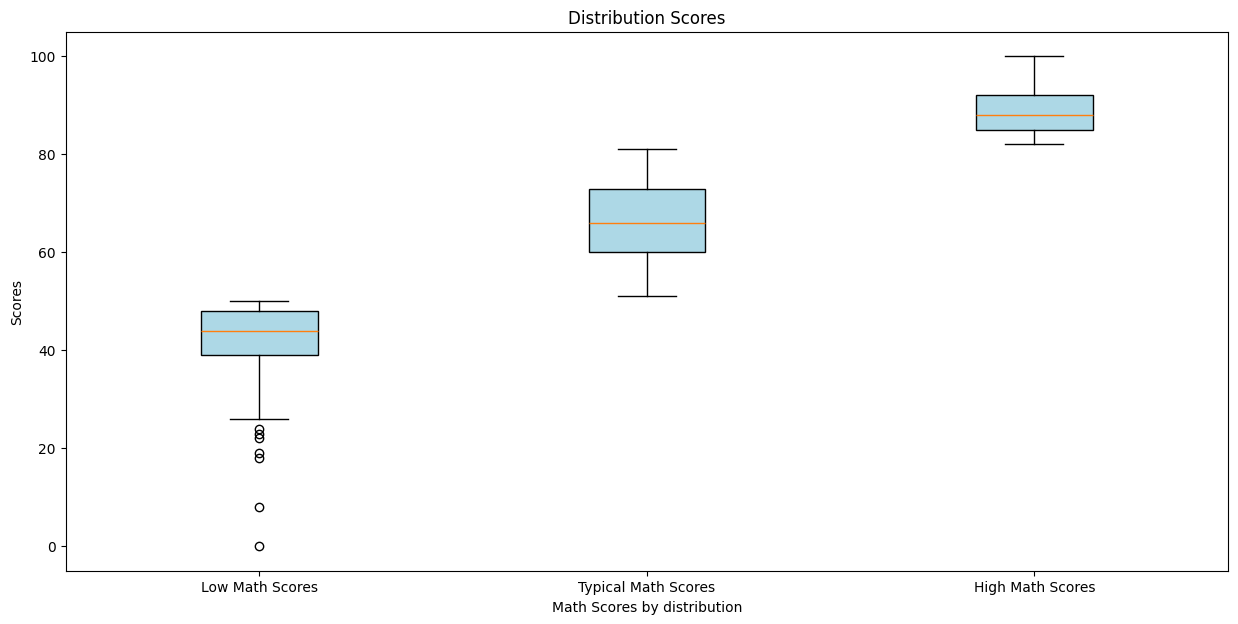

In [31]:
plt.figure(figsize=(15, 7))
plt.boxplot([df_math_low['math_score'], df_math_typical['math_score'], df_math_high['math_score']], 
            vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution Scores')
plt.xticks([1, 2, 3], ['Low Math Scores', 'Typical Math Scores', 'High Math Scores'])
plt.xlabel('Math Scores by distribution')
plt.ylabel('Scores')
plt.show()

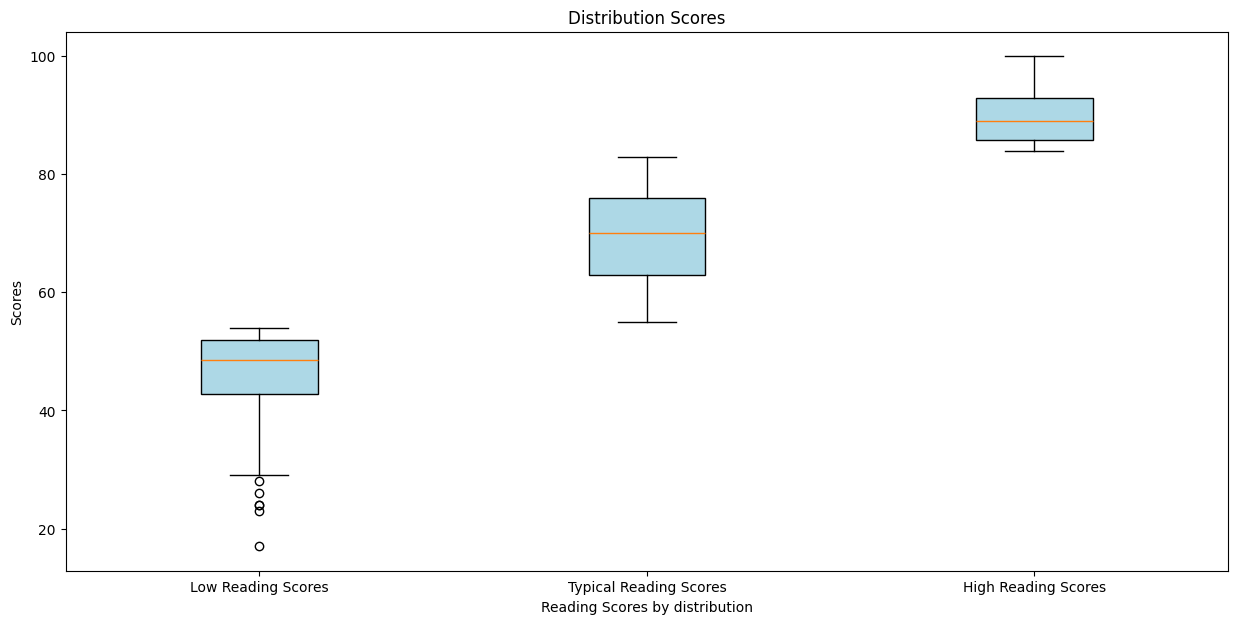

In [32]:
plt.figure(figsize=(15, 7))
plt.boxplot([df_reading_low['reading_score'], df_reading_typical['reading_score'], df_reading_high['reading_score']], 
            vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution Scores')
plt.xticks([1, 2, 3], ['Low Reading Scores', 'Typical Reading Scores', 'High Reading Scores'])
plt.xlabel('Reading Scores by distribution')
plt.ylabel('Scores')
plt.show()

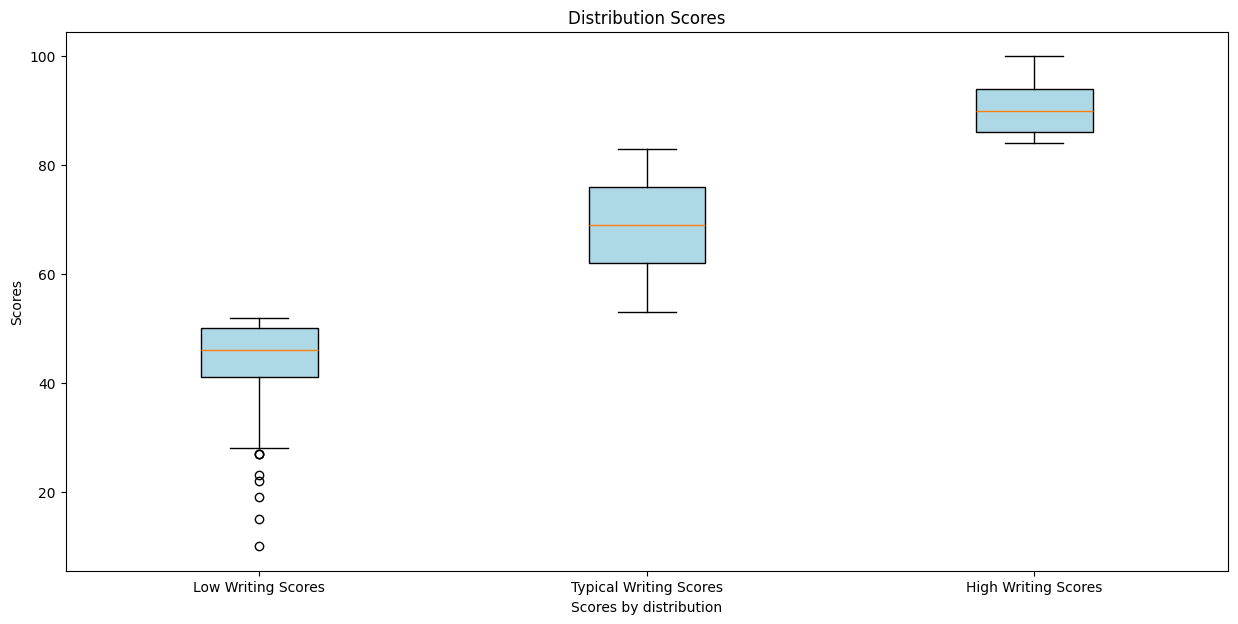

In [33]:
plt.figure(figsize=(15, 7))
plt.boxplot([df_writing_low['writing_score'], df_writing_typical['writing_score'], df_writing_high['writing_score']], 
            vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution Scores')
plt.xticks([1, 2, 3], ['Low Writing Scores', 'Typical Writing Scores', 'High Writing Scores'])
plt.xlabel('Scores by distribution')
plt.ylabel('Scores')
plt.show()

##### _*** Low Scores **_

In [34]:
def low_score_classification(score):
    if score <= 10:
        return '0-9'
    elif 9 < score <= 19:
        return '10-19'
    elif 19 < score <= 29:
        return '20-29'
    elif 29 < score <= 39:
        return '30-39'
    elif 39 < score <= 49:
        return '40-49'
    else:
        return '50 - 54'
    
math_low_students = df_math_low.shape[0]
math_low_females = df_math_low.loc[df_math_low['gender'] == 'female', :].shape[0]
math_low_males = df_math_low.loc[df_math_low['gender'] == 'male', :].shape[0]

print(f"*** Low MATH *** students: {math_low_students}, females: {math_low_females}, males: {math_low_males}")
print()
print(f"MATH Students with zero MATH score : {(df_math_low['math_score'] == 0).sum()}")
print()
df_math_low['score_classification'] = df_math_low['math_score'].apply(low_score_classification)
print("Low MATH score classification: \n", df_math_low.groupby(['score_classification'])['math_score'].count())
print()
print("Low MATH lunch: \n", df_math_low.groupby(['lunch'])['math_score'].count())
print()
print("Low MATH prep: \n", df_math_low.groupby(['test_preparation_course'])['math_score'].count())
print()
print(df_math_low.groupby(['race_ethnicity', 'parental_level_of_education'])['math_score'].count())
print()
print()
print()


reading_low_students = df_reading_low.shape[0]
reading_low_females = df_reading_low.loc[df_reading_low['gender'] == 'female', :].shape[0]
reading_low_males = df_reading_low.loc[df_reading_low['gender'] == 'male', :].shape[0]

print(f"*** Low READING *** students: {reading_low_students}, females: {reading_low_females}, males: {reading_low_males}")
print()
print(f"READING  Students with zero reading score : {(df_reading_low['reading_score'] == 0).sum()}")
print()
df_reading_low['score_classification'] = df_reading_low['reading_score'].apply(low_score_classification)
print("Low READING  score classification: \n", df_reading_low.groupby(['score_classification'])['reading_score'].count())
print()
print("Low READING  lunch: \n", df_reading_low.groupby(['lunch'])['reading_score'].count())
print()
print("Low READING  prep: \n", df_reading_low.groupby(['test_preparation_course'])['reading_score'].count())
print()
print(df_reading_low.groupby(['race_ethnicity', 'parental_level_of_education'])['reading_score'].count())
print()
print()
print()


writing_low_students = df_writing_low.shape[0]
writing_low_females = df_writing_low.loc[df_writing_low['gender'] == 'female', :].shape[0]
writing_low_males = df_writing_low.loc[df_writing_low['gender'] == 'male', :].shape[0]

print(f"*** Low WRITING *** students: {writing_low_students}, females: {writing_low_females}, males: {writing_low_males}")
print()
print(f"WRITING  Students with zero writing score : {(df_writing_low['writing_score'] == 0).sum()}")
print()
df_writing_low['score_classification'] = df_writing_low['writing_score'].apply(low_score_classification)
print("Low WRITING  score classification: \n", df_writing_low.groupby(['score_classification'])['writing_score'].count())
print()
print("Low WRITING  lunch: \n", df_writing_low.groupby(['lunch'])['writing_score'].count())
print()
print("Low WRITING  prep: \n", df_writing_low.groupby(['test_preparation_course'])['writing_score'].count())
print()
print(df_writing_low.groupby(['race_ethnicity', 'parental_level_of_education'])['writing_score'].count())
print()
print()
print()

*** Low MATH *** students: 150, females: 97, males: 53

MATH Students with zero MATH score : 1

Low MATH score classification: 
 score_classification
0-9         2
10-19       2
20-29      10
30-39      26
40-49      95
50 - 54    15
Name: math_score, dtype: int64

Low MATH lunch: 
 lunch
free_reduced    106
standard         44
Name: math_score, dtype: int64

Low MATH prep: 
 test_preparation_course
completed     33
none         117
Name: math_score, dtype: int64

race_ethnicity  parental_level_of_education
group_a         associate's_degree             4
                bachelor's_degree              2
                high_school                    3
                master's_degree                2
                some_college                   3
                                              ..
group_e         bachelor's_degree              1
                high_school                    2
                master's_degree                1
                some_college                  

C:\Users\luisp\AppData\Local\Temp\ipykernel_16264\2695484146.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_low['score_classification'] = df_math_low['math_score'].apply(low_score_classification)
C:\Users\luisp\AppData\Local\Temp\ipykernel_16264\2695484146.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reading_low['score_classification'] = df_reading_low['reading_score'].apply(low_score_classification)
C:\Users\luisp\AppData\Local\Temp\ipykernel_16264\2695484146.py:65: SettingWithCopy

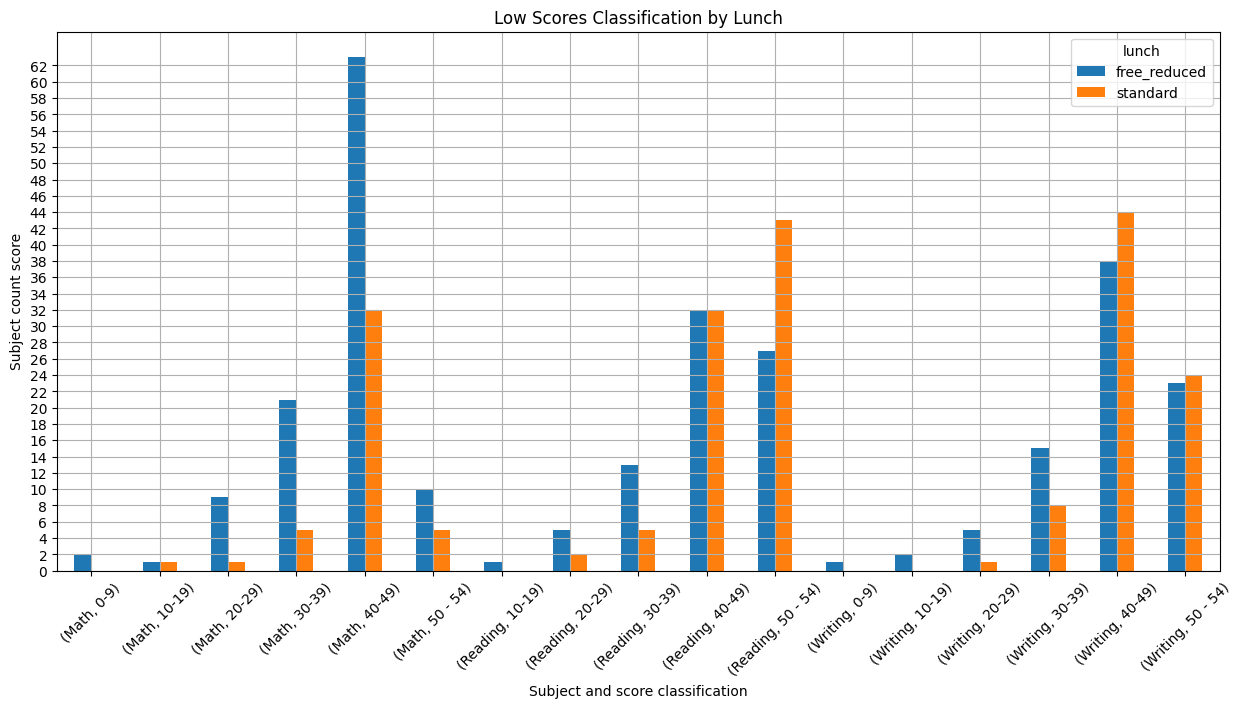

In [58]:
df_pvt_math_low_lnch = df_math_low.pivot_table(index='score_classification', 
                                               columns='lunch',
                                               values= 'math_score',
                                               aggfunc='count').fillna(0.0)

df_pvt_reading_low_lnch = df_reading_low.pivot_table(index='score_classification', 
                                                     columns='lunch',
                                                     values= 'reading_score',
                                                     aggfunc='count').fillna(0.0)

df_pvt_writing_low_lnch = df_writing_low.pivot_table(index='score_classification', 
                                                     columns='lunch',
                                                     values= 'writing_score',
                                                     aggfunc='count').fillna(0.0)

df_pvt_math_low_lnch['Subject'] = 'Math'
df_pvt_reading_low_lnch['Subject'] = 'Reading'
df_pvt_writing_low_lnch['Subject'] = 'Writing'

df_pvt_math_low_lnch = df_pvt_math_low_lnch.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_reading_low_lnch = df_pvt_reading_low_lnch.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_writing_low_lnch = df_pvt_writing_low_lnch.reset_index().set_index(['Subject', 'score_classification'])

df_combined_plot = pd.concat([df_pvt_math_low_lnch, 
                              df_pvt_reading_low_lnch, 
                              df_pvt_writing_low_lnch])

graph = df_combined_plot.plot(kind='bar', figsize=(15, 7), grid=True, rot=45)
graph.set_yticks(range(0, 64, 2))
plt.title('Low Scores Classification by Lunch')
plt.xlabel('Subject and score classification')
plt.ylabel('Subject count score')
plt.show()

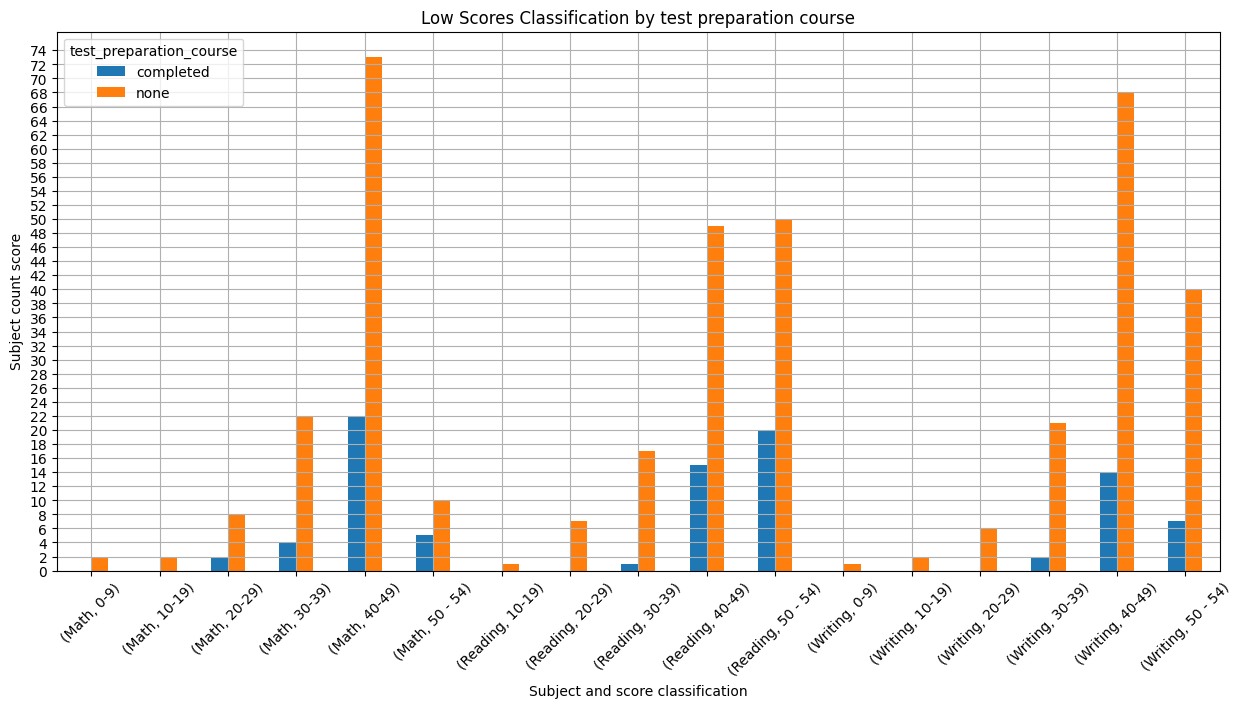

In [61]:
df_pvt_math_low_prep = df_math_low.pivot_table(index='score_classification', 
                                               columns='test_preparation_course',
                                               values= 'math_score',
                                               aggfunc='count').fillna(0.0)

df_pvt_reading_low_prep = df_reading_low.pivot_table(index='score_classification', 
                                                     columns='test_preparation_course',
                                                     values= 'reading_score',
                                                     aggfunc='count').fillna(0.0)

df_pvt_writing_low_prep = df_writing_low.pivot_table(index='score_classification', 
                                                     columns='test_preparation_course',
                                                     values= 'writing_score',
                                                     aggfunc='count').fillna(0.0)

df_pvt_math_low_prep['Subject'] = 'Math'
df_pvt_reading_low_prep['Subject'] = 'Reading'
df_pvt_writing_low_prep['Subject'] = 'Writing'

df_pvt_math_low_prep = df_pvt_math_low_prep.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_reading_low_prep = df_pvt_reading_low_prep.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_writing_low_prep = df_pvt_writing_low_prep.reset_index().set_index(['Subject', 'score_classification'])

df_combined_plot = pd.concat([df_pvt_math_low_prep, 
                              df_pvt_reading_low_prep, 
                              df_pvt_writing_low_prep])

graph = df_combined_plot.plot(kind='bar', figsize=(15, 7), grid=True, rot=45)
graph.set_yticks(range(0, 76, 2))
plt.title('Low Scores Classification by test preparation course')
plt.xlabel('Subject and score classification')
plt.ylabel('Subject count score')
plt.show()

##### _*** Typical Scores **_

In [62]:
def typical_score_classification(score):
    if score <= 59:
        return '51-59'
    elif 59 < score <= 69:
        return '60-69'
    elif 69 < score <= 79:
        return '70-79'
    else:
        return '80-83'

math_typical_students = df_math_typical.shape[0]
math_typical_females = df_math_typical.loc[df_math_typical['gender'] == 'female', :].shape[0]
math_typical_males = df_math_typical.loc[df_math_typical['gender'] == 'male', :].shape[0]

print(f"*** Typical MATH *** students: {math_typical_students}, females: {math_typical_females}, males: {math_typical_males}")
print()
print(f"Students with PASS score : {(df_math_typical['math_score'] > 59).sum()}")
print(f"Students with FAILED score : {(df_math_typical['math_score'] < 60).sum()}")
print()
df_math_typical['score_classification'] = df_math_typical['math_score'].apply(typical_score_classification)
print("Typical MATH score classification: \n", df_math_typical.groupby(['score_classification'])['math_score'].count())
print()
print("Typical MATH lunch: \n", df_math_typical.groupby(['lunch'])['math_score'].count())
print()
print("Typical MATH lunch failed: \n", df_math_typical.loc[df_math_typical['score_classification'] == '51-59'].groupby(['lunch'])['math_score'].count())
print()
print("Typical MATH lunch passed: \n", df_math_typical.loc[df_math_typical['score_classification'] != '51-59'].groupby(['lunch'])['math_score'].count())
print()
print("Typical MATH course preparation: \n", df_math_typical.groupby(['test_preparation_course'])['math_score'].count())
print()
print(df_math_typical.groupby(['race_ethnicity', 'parental_level_of_education'])['math_score'].count())
print()
print()
print()


reading_typical_students = df_reading_typical.shape[0]
reading_typical_females = df_reading_typical.loc[df_reading_typical['gender'] == 'female', :].shape[0]
reading_typical_males = df_reading_typical.loc[df_reading_typical['gender'] == 'male', :].shape[0]

print(f"*** Typical READING *** students: {reading_typical_students}, females: {reading_typical_females}, males: {reading_typical_males}")
print()
print(f"Students with PASS score : {(df_reading_typical['reading_score'] > 59).sum()}")
print(f"Students with FAILED score : {(df_reading_typical['reading_score'] < 60).sum()}")
print()
df_reading_typical['score_classification'] = df_reading_typical['reading_score'].apply(typical_score_classification)
print("Typical READING score classification: \n", df_reading_typical.groupby(['score_classification'])['reading_score'].count())
print()
print("Typical READING lunch: \n", df_reading_typical.groupby(['lunch'])['reading_score'].count())
print()
print("Typical READING lunch failed: \n", df_reading_typical.loc[df_reading_typical['score_classification'] == '51-59'].groupby(['lunch'])['reading_score'].count())
print()
print("Typical READING lunch passed: \n", df_reading_typical.loc[df_reading_typical['score_classification'] != '51-59'].groupby(['lunch'])['reading_score'].count())
print()
print("Typical READING course preparation: \n", df_reading_typical.groupby(['test_preparation_course'])['reading_score'].count())
print()
print(df_reading_typical.groupby(['race_ethnicity', 'parental_level_of_education'])['reading_score'].count())
print()
print()
print()


writing_typical_students = df_writing_typical.shape[0]
writing_typical_females = df_writing_typical.loc[df_writing_typical['gender'] == 'female', :].shape[0]
writing_typical_males = df_writing_typical.loc[df_writing_typical['gender'] == 'male', :].shape[0]

print(f"*** Typical WRITING *** students: {writing_typical_students}, females: {writing_typical_females}, males: {writing_typical_males}")
print()
print(f"Students with PASS score : {(df_writing_typical['writing_score'] > 59).sum()}")
print(f"Students with FAILED score : {(df_writing_typical['writing_score'] < 60).sum()}")
print()
df_writing_typical['score_classification'] = df_writing_typical['writing_score'].apply(typical_score_classification)
print("Typical WRITING  score classification: \n", df_writing_typical.groupby(['score_classification'])['writing_score'].count())
print()
print("Typical WRITING  lunch: \n", df_writing_typical.groupby(['lunch'])['writing_score'].count())
print()
print("Typical WRITING  lunch failed: \n", df_writing_typical.loc[df_writing_typical['score_classification'] == '51-59'].groupby(['lunch'])['writing_score'].count())
print()
print("Typical WRITING  lunch passed: \n", df_writing_typical.loc[df_writing_typical['score_classification'] != '51-59'].groupby(['lunch'])['writing_score'].count())
print()
print("Typical WRITING  course preparation: \n", df_writing_typical.groupby(['test_preparation_course'])['writing_score'].count())
print()
print(df_writing_typical.groupby(['race_ethnicity', 'parental_level_of_education'])['writing_score'].count())
print()
print()
print()

*** Typical MATH *** students: 696, females: 361, males: 335

Students with PASS score : 523
Students with FAILED score : 173

Typical MATH score classification: 
 score_classification
51-59    173
60-69    268
70-79    216
80-83     39
Name: math_score, dtype: int64

Typical MATH lunch: 
 lunch
free_reduced    232
standard        464
Name: math_score, dtype: int64

Typical MATH lunch failed: 
 lunch
free_reduced     69
standard        104
Name: math_score, dtype: int64

Typical MATH lunch passed: 
 lunch
free_reduced    163
standard        360
Name: math_score, dtype: int64

Typical MATH course preparation: 
 test_preparation_course
completed    249
none         447
Name: math_score, dtype: int64

race_ethnicity  parental_level_of_education
group_a         associate's_degree              8
                bachelor's_degree               8
                high_school                    15
                master's_degree                 1
                some_college                   1

C:\Users\luisp\AppData\Local\Temp\ipykernel_16264\1340947506.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_typical['score_classification'] = df_math_typical['math_score'].apply(typical_score_classification)
C:\Users\luisp\AppData\Local\Temp\ipykernel_16264\1340947506.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reading_typical['score_classification'] = df_reading_typical['reading_score'].apply(typical_score_classification)
C:\Users\luisp\AppData\Local\Temp\ipykernel_16264\134094750

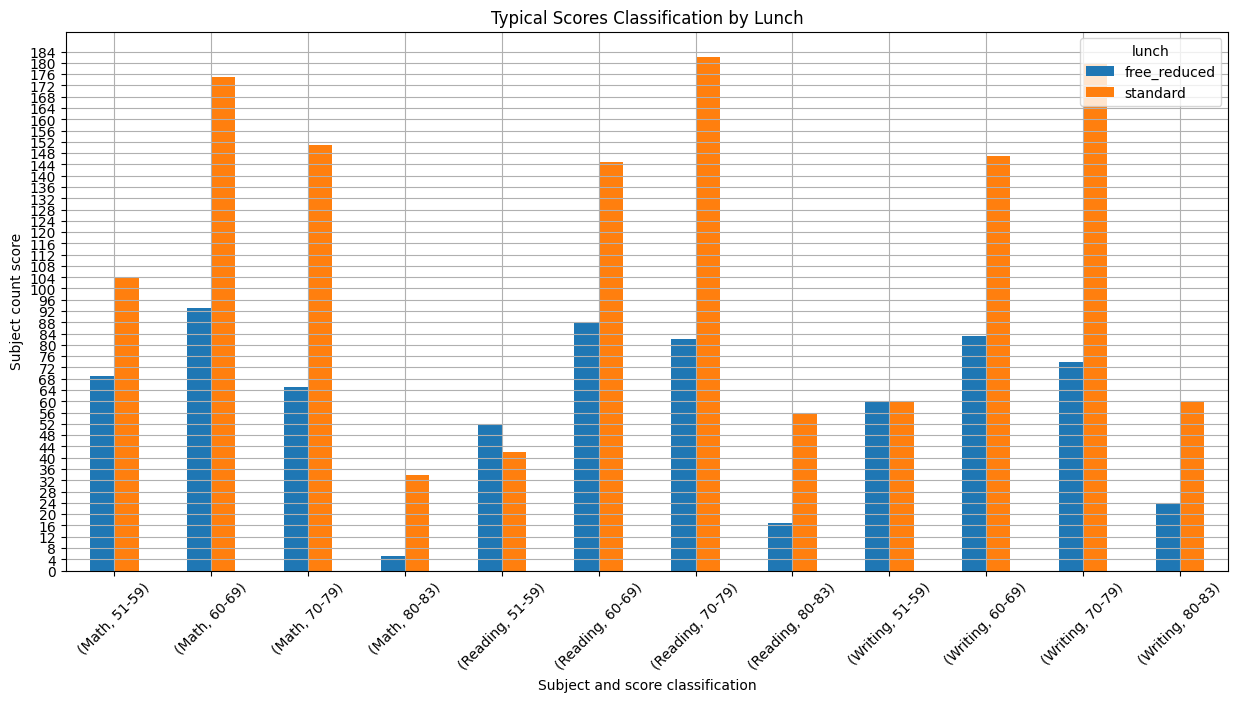

In [79]:
df_pvt_math_typical_lnch = df_math_typical.pivot_table(index='score_classification', 
                                                      columns='lunch',
                                                      values= 'math_score',
                                                      aggfunc='count').fillna(0.0)

df_pvt_reading_typical_lnch = df_reading_typical.pivot_table(index='score_classification', 
                                                             columns='lunch',
                                                             values= 'reading_score',
                                                             aggfunc='count').fillna(0.0)

df_pvt_writing_typical_lnch = df_writing_typical.pivot_table(index='score_classification', 
                                                             columns='lunch',
                                                             values= 'writing_score',
                                                             aggfunc='count').fillna(0.0)

df_pvt_math_typical_lnch['Subject'] = 'Math'
df_pvt_reading_typical_lnch['Subject'] = 'Reading'
df_pvt_writing_typical_lnch['Subject'] = 'Writing'

df_pvt_math_typical_lnch = df_pvt_math_typical_lnch.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_reading_typical_lnch = df_pvt_reading_typical_lnch.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_writing_typical_lnch = df_pvt_writing_typical_lnch.reset_index().set_index(['Subject', 'score_classification'])

df_combined_plot = pd.concat([df_pvt_math_typical_lnch, 
                              df_pvt_reading_typical_lnch, 
                              df_pvt_writing_typical_lnch])

graph = df_combined_plot.plot(kind='bar', figsize=(15, 7), grid=True, rot=45)
graph.set_yticks(range(0, 188, 4))
plt.title('Typical Scores Classification by Lunch')
plt.xlabel('Subject and score classification')
plt.ylabel('Subject count score')
plt.show()

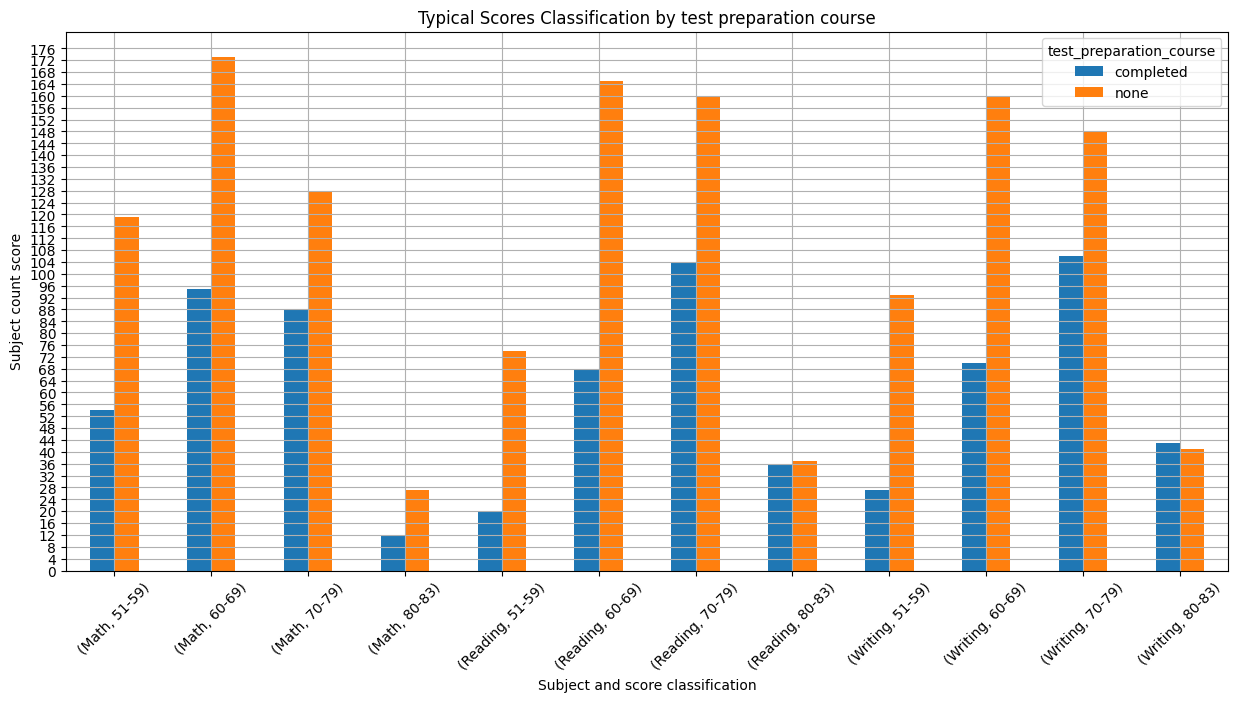

In [77]:
df_pvt_math_typical_prep = df_math_typical.pivot_table(index='score_classification', 
                                                       columns='test_preparation_course',
                                                       values= 'math_score',
                                                       aggfunc='count').fillna(0.0)

df_pvt_reading_typical_prep = df_reading_typical.pivot_table(index='score_classification', 
                                                             columns='test_preparation_course',
                                                             values= 'reading_score',
                                                             aggfunc='count').fillna(0.0)

df_pvt_writing_typical_prep = df_writing_typical.pivot_table(index='score_classification', 
                                                             columns='test_preparation_course',
                                                             values= 'writing_score',
                                                             aggfunc='count').fillna(0.0)

df_pvt_math_typical_prep['Subject'] = 'Math'
df_pvt_reading_typical_prep['Subject'] = 'Reading'
df_pvt_writing_typical_prep['Subject'] = 'Writing'

df_pvt_math_typical_prep = df_pvt_math_typical_prep.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_reading_typical_prep = df_pvt_reading_typical_prep.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_writing_typical_prep = df_pvt_writing_typical_prep.reset_index().set_index(['Subject', 'score_classification'])

df_combined_plot = pd.concat([df_pvt_math_typical_prep, 
                              df_pvt_reading_typical_prep, 
                              df_pvt_writing_typical_prep])

graph = df_combined_plot.plot(kind='bar', figsize=(15, 7), grid=True, rot=45)
graph.set_yticks(range(0, 177, 4))
plt.title('Typical Scores Classification by test preparation course')
plt.xlabel('Subject and score classification')
plt.ylabel('Subject count score')
plt.show()

##### _*** High Scores **_

In [80]:
def high_score_classification(score):
    if score <= 89:
        return '82-89'
    elif 89 < score <= 99:
        return '90-99'
    else:
        return '100'

math_high_students = df_math_high.shape[0]
math_high_females = df_math_high.loc[df_math_high['gender'] == 'female', :].shape[0]
math_high_males = df_math_high.loc[df_math_high['gender'] == 'male', :].shape[0]

print(f"*** High MATH *** students: {math_high_students}, females: {math_high_females}, High MATH males: {math_high_males}")
print()
print(f"Students with 100 MATH score : {(df_math_high['math_score'] == 100).sum()}")
print()
score100_female = df_math_high.loc[(df_math_high['math_score'] == 100) & (df_math_high['gender'] == 'female')].shape[0]
print(f"Number of females with a score of 100: {score100_female}")
score100_male = df_math_high.loc[(df_math_high['math_score'] == 100) & (df_math_high['gender'] == 'male')].shape[0]
print(f"Number of males with a score of 100: {score100_male}")
print()
df_math_high['score_classification'] = df_math_high['math_score'].apply(high_score_classification)
print("High MATH score classification: \n", df_math_high.groupby(['score_classification'])['math_score'].count())
print()
print("High MATH lunch: \n", df_math_high.groupby(['lunch'])['math_score'].count())
print()
print("High MATH prep: \n", df_math_high.groupby(['test_preparation_course'])['math_score'].count())
print()
print(df_math_high.groupby(['race_ethnicity', 'parental_level_of_education'])['math_score'].count())
print()
print()
print()


reading_high_students = df_reading_high.shape[0]
reading_high_females = df_reading_high.loc[df_reading_high['gender'] == 'female', :].shape[0]
reading_high_males = df_reading_high.loc[df_reading_high['gender'] == 'male', :].shape[0]

print(f"*** High READING *** students: {reading_high_students}, females: {reading_high_females}, High reading males: {reading_high_males}")
print()
print(f"Students with 100 reading score : {(df_reading_high['reading_score'] == 100).sum()}")
print()
score100_female = df_reading_high.loc[(df_reading_high['reading_score'] == 100) & (df_reading_high['gender'] == 'female')].shape[0]
print(f"Number of females with a score of 100: {score100_female}")
score100_male = df_reading_high.loc[(df_reading_high['reading_score'] == 100) & (df_reading_high['gender'] == 'male')].shape[0]
print(f"Number of males with a score of 100: {score100_male}")
print()
df_reading_high['score_classification'] = df_reading_high['reading_score'].apply(high_score_classification)
print("High READING score classification: \n", df_reading_high.groupby(['score_classification'])['reading_score'].count())
print()
print("High READING lunch: \n", df_reading_high.groupby(['lunch'])['reading_score'].count())
print()
print("High READING prep: \n", df_reading_high.groupby(['test_preparation_course'])['reading_score'].count())
print()
print(df_reading_high.groupby(['race_ethnicity', 'parental_level_of_education'])['reading_score'].count())
print()
print()
print()


writing_high_students = df_writing_high.shape[0]
writing_high_females = df_writing_high.loc[df_writing_high['gender'] == 'female', :].shape[0]
writing_high_males = df_writing_high.loc[df_writing_high['gender'] == 'male', :].shape[0]

print(f"*** High WRITING *** students: {writing_high_students}, females: {writing_high_females}, High writing males: {writing_high_males}")
print()
print(f"Students with 100 writing score : {(df_writing_high['writing_score'] == 100).sum()}")
print()
score100_female = df_writing_high.loc[(df_writing_high['writing_score'] == 100) & (df_writing_high['gender'] == 'female')].shape[0]
print(f"Number of females with a score of 100: {score100_female}")
score100_male = df_writing_high.loc[(df_writing_high['writing_score'] == 100) & (df_writing_high['gender'] == 'male')].shape[0]
print(f"Number of males with a score of 100: {score100_male}")
print()
df_writing_high['score_classification'] = df_writing_high['writing_score'].apply(high_score_classification)
print("High WRITING score classification: \n", df_writing_high.groupby(['score_classification'])['writing_score'].count())
print()
print("High WRITING lunch: \n", df_writing_high.groupby(['lunch'])['writing_score'].count())
print()
print("High WRITING prep: \n", df_writing_high.groupby(['test_preparation_course'])['writing_score'].count())
print()
print(df_writing_high.groupby(['race_ethnicity', 'parental_level_of_education'])['writing_score'].count())
print()
print()
print()

*** High MATH *** students: 154, females: 60, High MATH males: 94

Students with 100 MATH score : 7

Number of females with a score of 100: 3
Number of males with a score of 100: 4

High MATH score classification: 
 score_classification
100       7
82-89    96
90-99    51
Name: math_score, dtype: int64

High MATH lunch: 
 lunch
free_reduced     17
standard        137
Name: math_score, dtype: int64

High MATH prep: 
 test_preparation_course
completed    76
none         78
Name: math_score, dtype: int64

race_ethnicity  parental_level_of_education
group_a         associate's_degree              2
                bachelor's_degree               2
                some_college                    1
                some_high_school                2
group_b         associate's_degree              8
                                               ..
group_e         bachelor's_degree               6
                high_school                     5
                master's_degree                 

C:\Users\luisp\AppData\Local\Temp\ipykernel_16264\596317161.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_math_high['score_classification'] = df_math_high['math_score'].apply(high_score_classification)
C:\Users\luisp\AppData\Local\Temp\ipykernel_16264\596317161.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reading_high['score_classification'] = df_reading_high['reading_score'].apply(high_score_classification)
C:\Users\luisp\AppData\Local\Temp\ipykernel_16264\596317161.py:74: SettingWithC

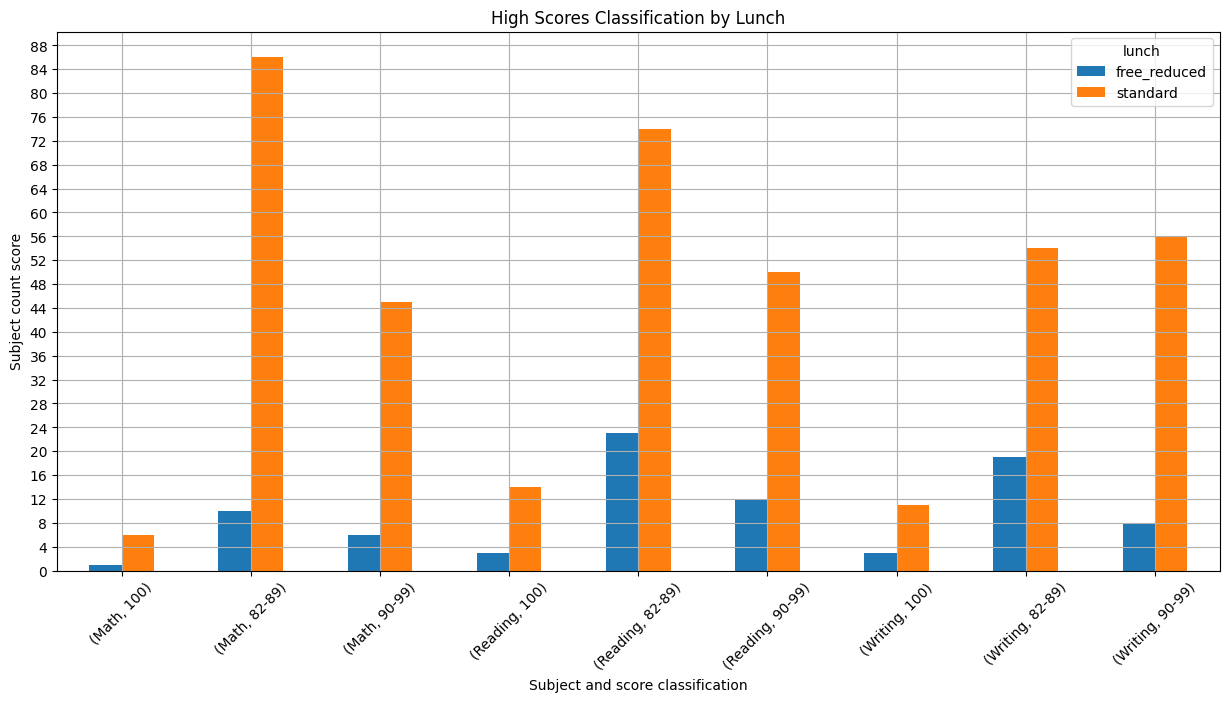

In [83]:
df_pvt_math_high_lnch = df_math_high.pivot_table(index='score_classification', 
                                                 columns='lunch',
                                                 values= 'math_score',
                                                 aggfunc='count').fillna(0.0)

df_pvt_reading_high_lnch = df_reading_high.pivot_table(index='score_classification', 
                                                       columns='lunch',
                                                       values= 'reading_score',
                                                       aggfunc='count').fillna(0.0)

df_pvt_writing_high_lnch = df_writing_high.pivot_table(index='score_classification', 
                                                       columns='lunch',
                                                       values= 'writing_score',
                                                       aggfunc='count').fillna(0.0)

df_pvt_math_high_lnch['Subject'] = 'Math'
df_pvt_reading_high_lnch['Subject'] = 'Reading'
df_pvt_writing_high_lnch['Subject'] = 'Writing'

df_pvt_math_high_lnch = df_pvt_math_high_lnch.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_reading_high_lnch = df_pvt_reading_high_lnch.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_writing_high_lnch = df_pvt_writing_high_lnch.reset_index().set_index(['Subject', 'score_classification'])

df_combined_plot = pd.concat([df_pvt_math_high_lnch, 
                              df_pvt_reading_high_lnch, 
                              df_pvt_writing_high_lnch])

graph = df_combined_plot.plot(kind='bar', figsize=(15, 7), grid=True, rot=45)
graph.set_yticks(range(0, 91, 4))
plt.title('High Scores Classification by Lunch')
plt.xlabel('Subject and score classification')
plt.ylabel('Subject count score')
plt.show()

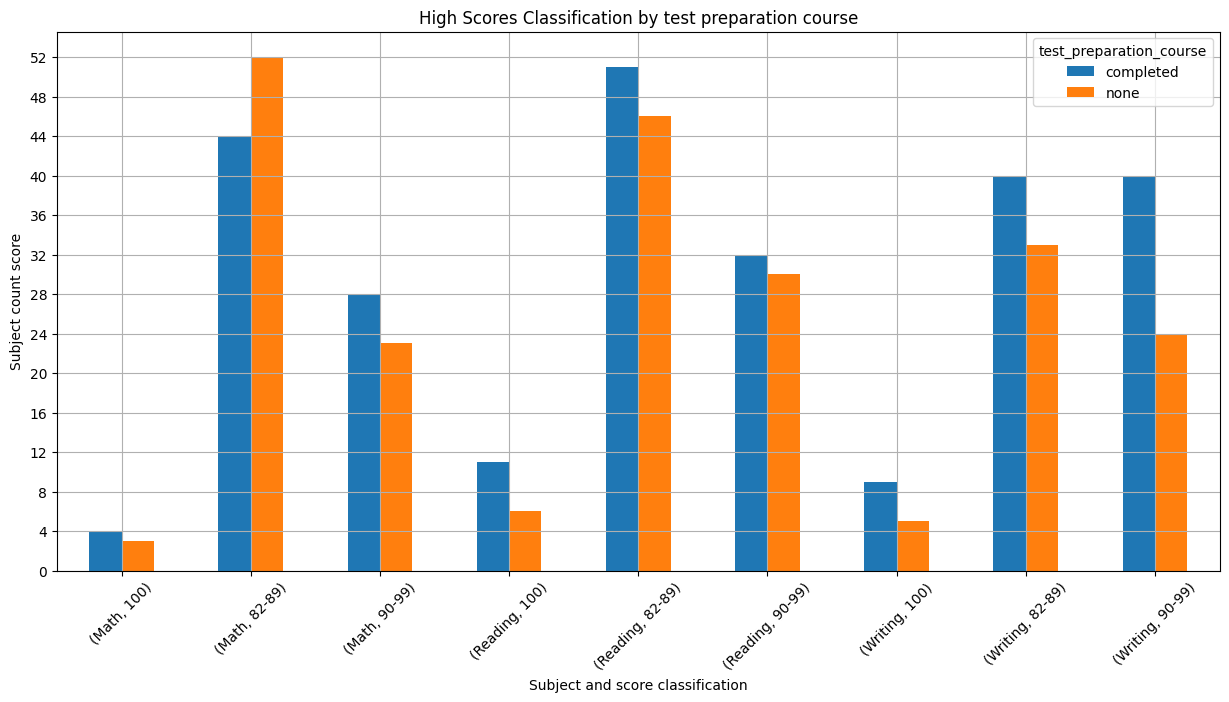

In [87]:
df_pvt_math_high_prep = df_math_high.pivot_table(index='score_classification', 
                                                 columns='test_preparation_course',
                                                 values= 'math_score',
                                                 aggfunc='count').fillna(0.0)

df_pvt_reading_high_prep = df_reading_high.pivot_table(index='score_classification', 
                                                       columns='test_preparation_course',
                                                       values= 'reading_score',
                                                       aggfunc='count').fillna(0.0)

df_pvt_writing_high_prep = df_writing_high.pivot_table(index='score_classification', 
                                                       columns='test_preparation_course',
                                                       values= 'writing_score',
                                                       aggfunc='count').fillna(0.0)

df_pvt_math_high_prep['Subject'] = 'Math'
df_pvt_reading_high_prep['Subject'] = 'Reading'
df_pvt_writing_high_prep['Subject'] = 'Writing'

df_pvt_math_high_prep = df_pvt_math_high_prep.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_reading_high_prep = df_pvt_reading_high_prep.reset_index().set_index(['Subject', 'score_classification'])
df_pvt_writing_high_prep = df_pvt_writing_high_prep.reset_index().set_index(['Subject', 'score_classification'])

df_combined_plot = pd.concat([df_pvt_math_high_prep, 
                              df_pvt_reading_high_prep, 
                              df_pvt_writing_high_prep])

graph = df_combined_plot.plot(kind='bar', figsize=(15, 7), grid=True, rot=45)
graph.set_yticks(range(0, 54, 4))
plt.title('High Scores Classification by test preparation course')
plt.xlabel('Subject and score classification')
plt.ylabel('Subject count score')
plt.show()